In [1]:
from functions import *
import os
import subprocess
import pickle
import matplotlib.pyplot as plt

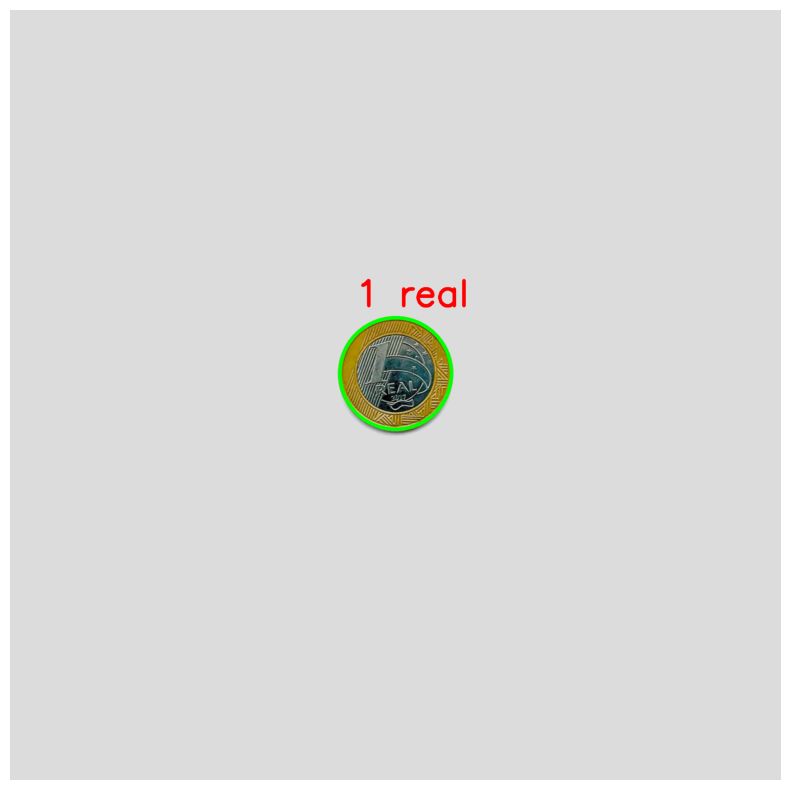

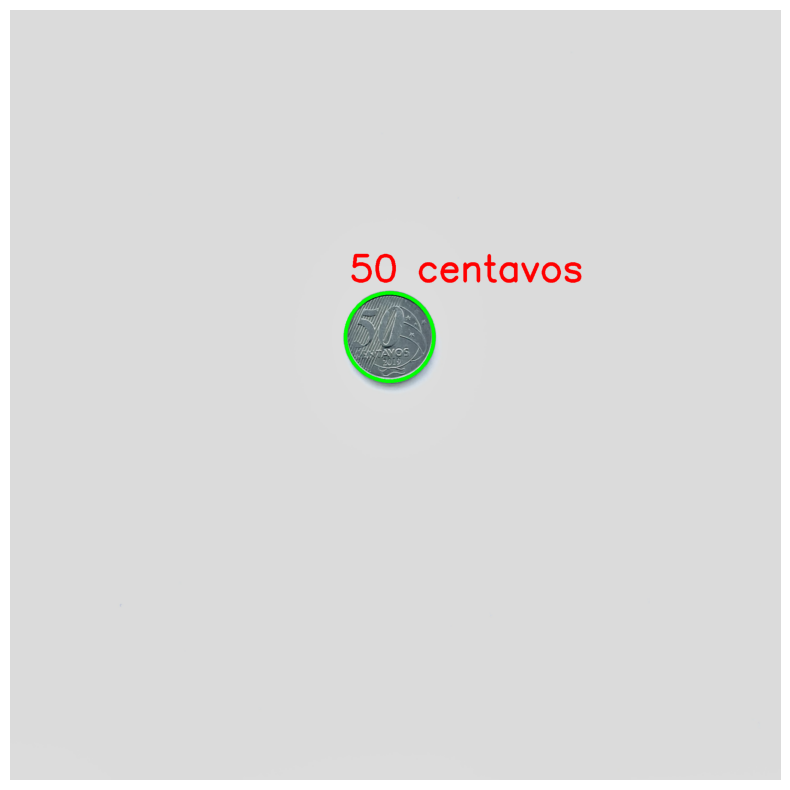

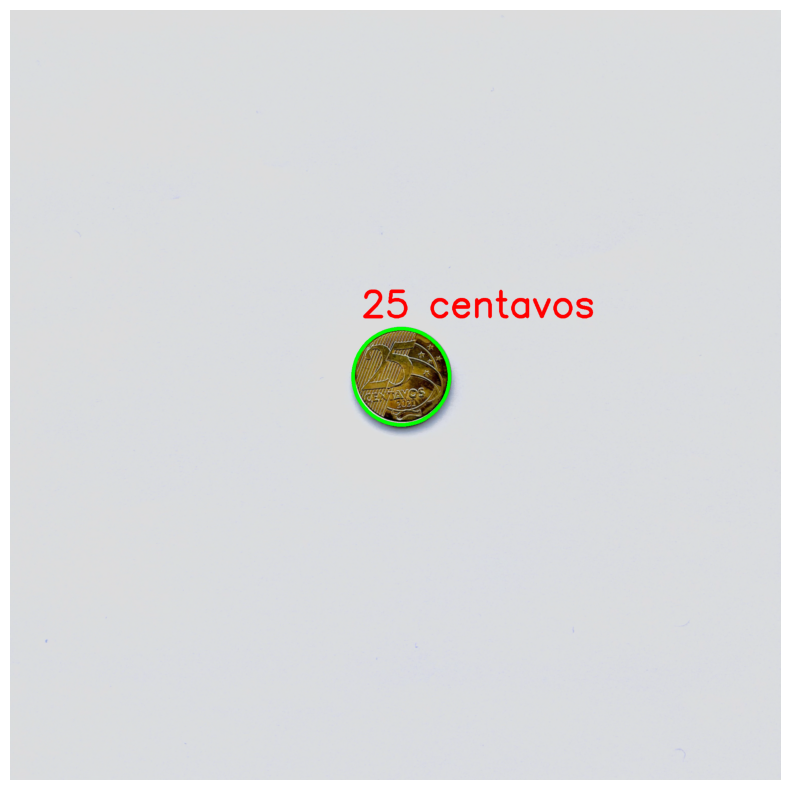

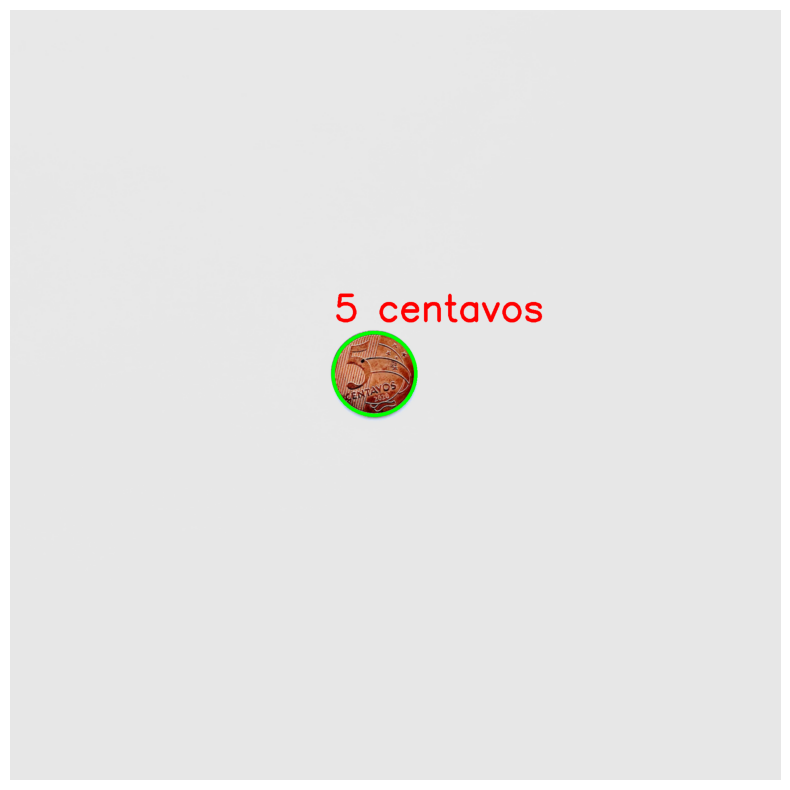

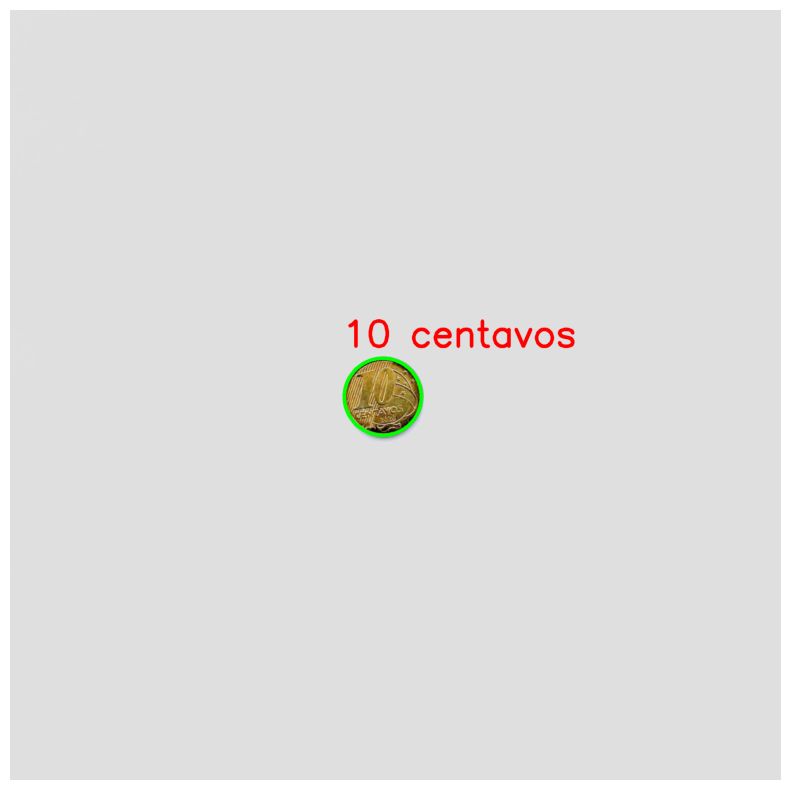

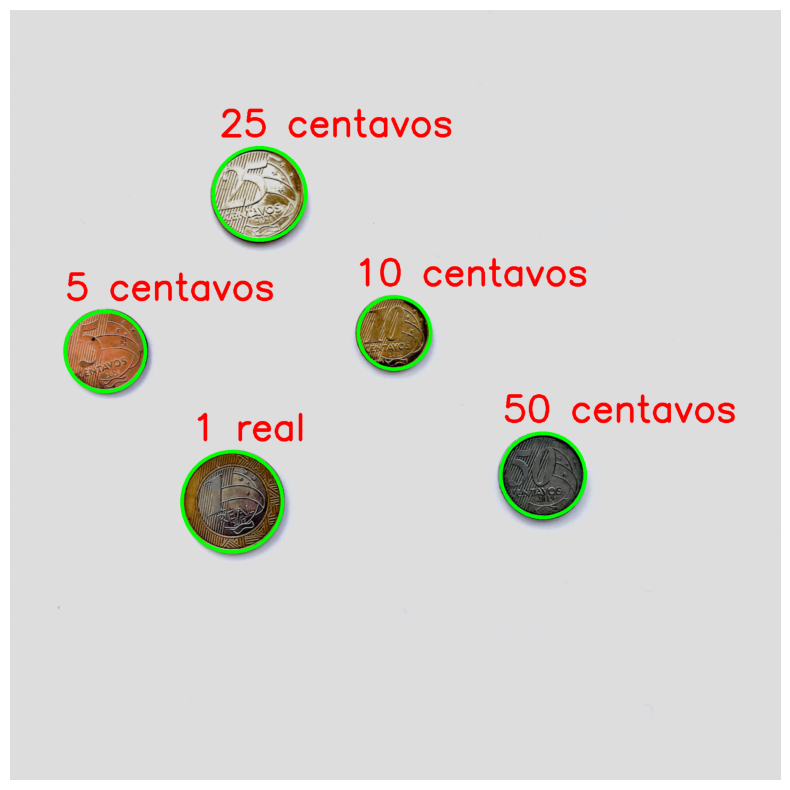

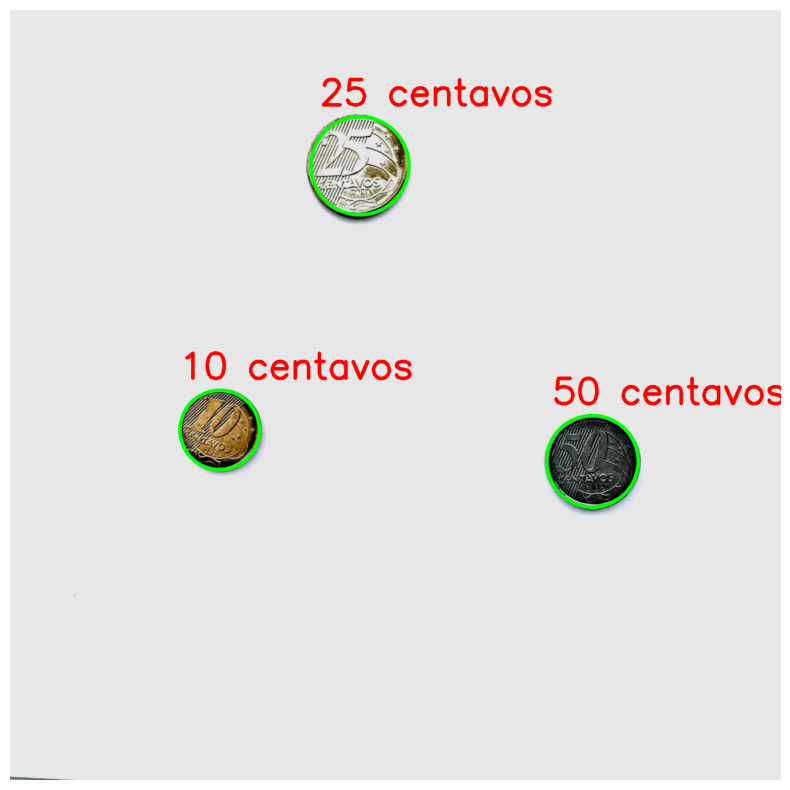

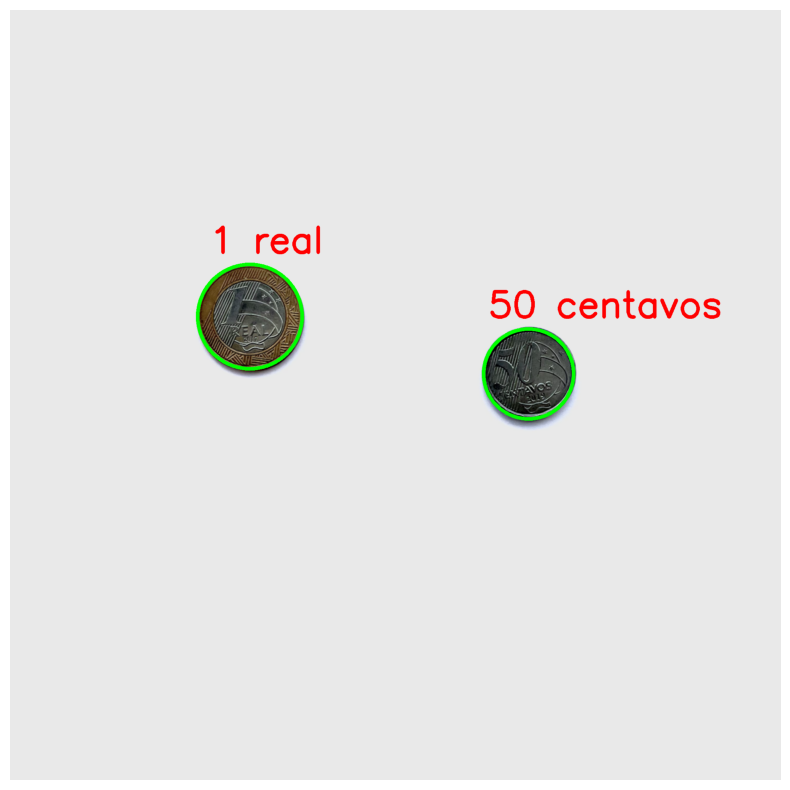

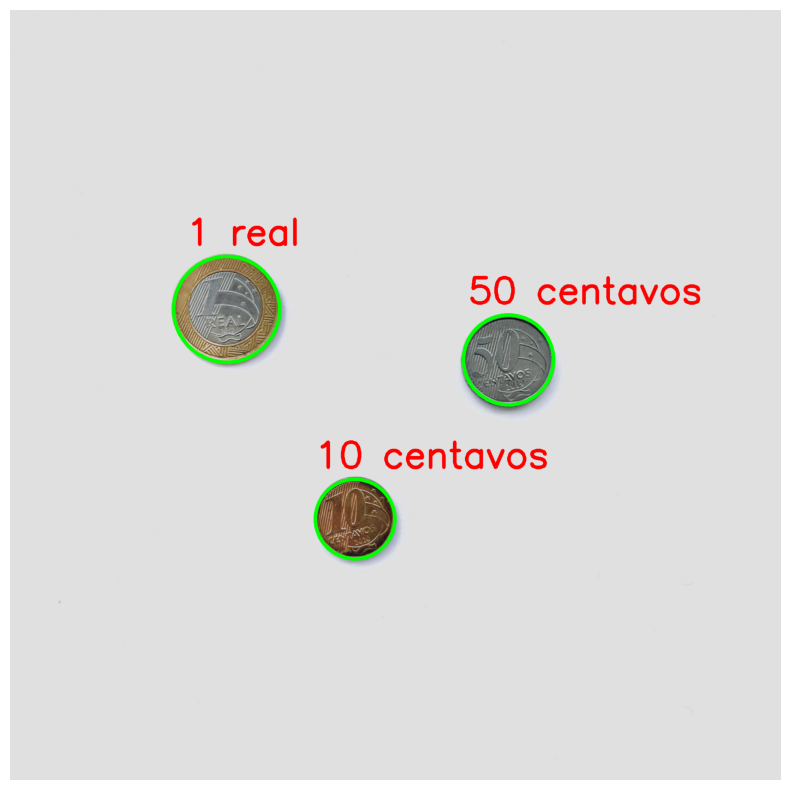

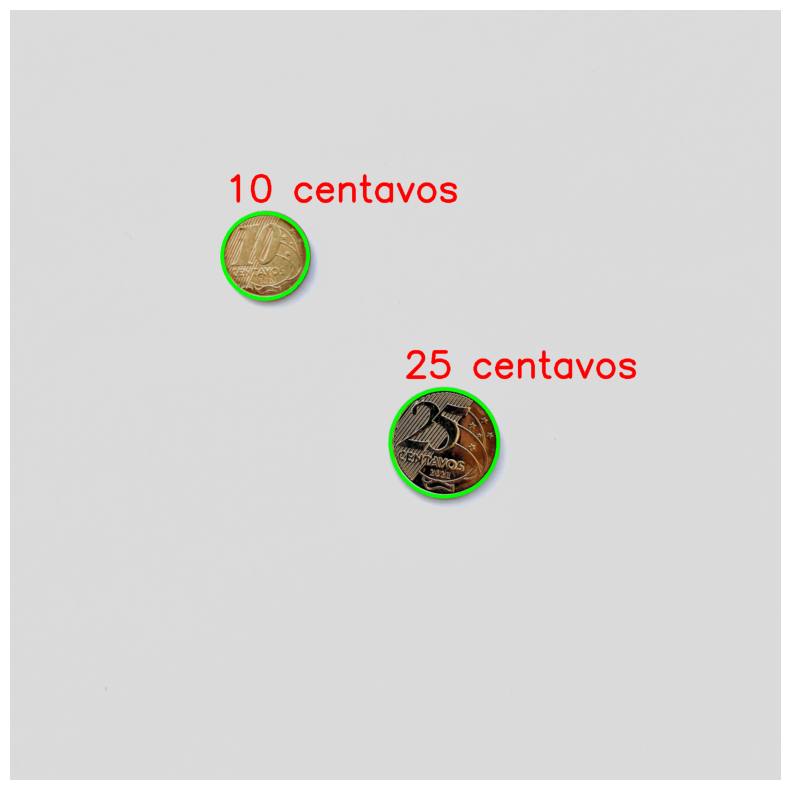

In [3]:
def main():
    model_filename = 'files/coin_classifier.pkl'
    training_data_filename = 'files/training_data.pkl'
    
    labels = [
        ['1 real'],
        ['50 centavos'],
        ['25 centavos'],
        ['5 centavos'],
        ['10 centavos'],
        ['50 centavos', '25 centavos', '1 real', '5 centavos', '10 centavos'],
        ['50 centavos', '25 centavos', '10 centavos'],
        ['1 real', '50 centavos'],
        ['1 real', '50 centavos', '10 centavos'],
        ['25 centavos', '10 centavos']
    ]

    # Check if the model file exists
    if not os.path.exists(model_filename):
        # If the model file does not exist, collect all coins and create training data
        training_data = []

        for i in range(10):
            img_gray, img_rgb = prepare_img(f'images/img{i}.png')
            circles = find_circles(img_gray)
            circles = treat_circles(circles)
            
            if circles is not None:
                filtered_circles = filter_inner_circles(circles, 10)
                coins_histograms = create_histogram_of_visual_words(img_rgb, filtered_circles)
                update_training_data(coins_histograms, labels[i], training_data)
        
        save_training_data(training_data, training_data_filename)

        # Run the train_classifier.py script to train the model
        subprocess.run(['python', 'train_classifier.py'])
    
    # Load the trained model
    with open(model_filename, 'rb') as f:
        model = pickle.load(f)
    

    for i in range(10):
        img_gray, img_rgb = prepare_img(f'images/img{i}.png')
        circles = find_circles(img_gray)
        circles = treat_circles(circles)
        
        if circles is not None:
            filtered_circles = filter_inner_circles(circles, 10)
            coins_histograms = create_histogram_of_visual_words(img_rgb, filtered_circles)

            # Predict the class of each coin
            predictions = model.predict(coins_histograms)
            
             # Draw the circles and predictions
            for (x, y, r), prediction in zip(filtered_circles, predictions):
                # Draw the circle
                cv2.circle(img_rgb, (x, y), r, (0, 255, 0), 8)
                
                # Draw the prediction
                cv2.putText(img_rgb, prediction, (x-100, y-(r+30)), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 8)
                
            # Display the image
            plt.figure(figsize=(20,10))
            plt.imshow(img_rgb)
            plt.axis('off')  
            plt.show()

main()